In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [31]:
#Read in Data, Merge the DF, and Preview.dup
mouse_metadata_path = "Pymaceuticals\\data\\Mouse_metadata.csv"
study_results_path = "Pymaceuticals\\data\\Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
study_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1       Male          15          29  
2     Female           2          29  
3     Female          11          30  
4       Male          21          25  
...      ...         ...         ...  
1888    Male          12          25  
1889    Male          18          17  
1890  Female          11          26  
1891  Female          21          30  
1892  Female           4          26  

[1893 rows x 8 columns]

In [32]:
#Check if any NaN
study_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [33]:
#Check how many mice we have
len(pd.unique(study_df['Mouse ID']))

249

In [34]:
#Find the duplicates
duplicate_entries = study_df[study_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_entries

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26

In [35]:
#Drop duplicates
complete_study = study_df.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')

In [36]:
#Make sure no more duplicates
duplicate_entries = complete_study[complete_study.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_entries

Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []

In [37]:
#Check how many entries we now have
complete_study.count()

Mouse ID              1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
dtype: int64

In [38]:
#Create summary statistics table
complete_study.describe()

Timepoint  Tumor Volume (mm3)  Metastatic Sites   Age_months  \
count  1888.000000         1888.000000       1888.000000  1888.000000   
mean     19.597458           50.449276          1.023835    12.792903   
std      14.084762            8.904565          1.138507     7.186737   
min       0.000000           22.050126          0.000000     1.000000   
25%       5.000000           45.000000          0.000000     7.000000   
50%      20.000000           48.951421          1.000000    13.000000   
75%      30.000000           56.324075          2.000000    20.000000   
max      45.000000           78.567014          4.000000    24.000000   

        Weight (g)  
count  1888.000000  
mean     25.661547  
std       3.926776  
min      15.000000  
25%      25.000000  
50%      27.000000  
75%      29.000000  
max      30.000000

In [39]:
#Create Grouping by Drug Regimen and Summary Table
drug_grouping = complete_study.groupby(['Drug Regimen'])
Tumor_Volume_by_Drug = drug_grouping['Tumor Volume (mm3)']

In [40]:
#Calculate the fields
mean = Tumor_Volume_by_Drug.mean()
stnd = Tumor_Volume_by_Drug.std()
sems = Tumor_Volume_by_Drug.sem()
median = Tumor_Volume_by_Drug.median()
var = Tumor_Volume_by_Drug.var()

#Rename Series
Tumor_Mean = mean.rename("Mean")
Tumor_Median = median.rename("Median")
Tumor_STD = stnd.rename("STD")
Tumor_Var = var.rename("Variance")
Tumor_SEM = sems.rename("SEM")

summary_stats = {'Mean': Tumor_Mean, 'Median': Tumor_Median, 'STD': Tumor_STD, 'Variance': Tumor_Var, 'SEM': Tumor_SEM}
Drug_Regimen_Summary = pd.DataFrame(summary_stats)
Drug_Regimen_Summary

Mean     Median       STD   Variance       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin      52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol     52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril      55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol      54.331565  52.509285  8.134708  66.173479  0.596466
Placebo       54.033581  52.288934  7.821003  61.168083  0.581331
Propriva      52.393463  50.909965  6.568014  43.138803  0.525862
Ramicane      40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn      54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol     53.236507  51.818479  6.966589  48.533355  0.516398

<BarContainer object of 10 artists>

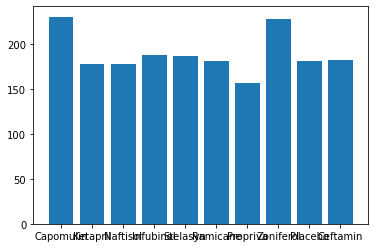

In [62]:
#PyPlot bar chart
mice_counts = drug_grouping['Mouse ID'].count()
x_axis = pd.unique(study_df['Drug Regimen'])
plt.bar(x_axis, mice_counts)

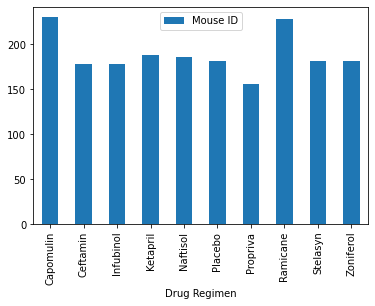

In [68]:
#DataFrame plot
Drug_Counts = pd.DataFrame(drug_grouping['Mouse ID'].count())
Drug_Counts.plot(kind="bar")